<a href="https://colab.research.google.com/github/Josephnyingi/Clime/blob/main/Clime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load data into pandas dataframe
2. Train model using Facebook Prophet
3. Make future dataframes and forecast forward.

#Import necessary Libaries

In [80]:
!pip install prophet -q

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error




#Import the data

In [82]:
weather = pd.read_csv("/content/Forecast_Dataset-1.51S37.27E1627m.csv.csv", index_col= "DATE")
weather.head()
#Date is used as our Index (ID)

,TEMPERATURE,RAIN
DATE,,
2022-12-04,17.4,1.5
2022-12-05,18.0,2.4
2022-12-06,18.6,0.8
2022-12-07,18.7,0.7
2022-12-08,18.0,1.5


#Clean the data

In [83]:
# Get rid of missing values
# Calculate null percentage
null_percentage = weather.isnull().sum()/weather.shape[0]
null_percentage




,0
TEMPERATURE,0.0
RAIN,0.0


The data has no null values

In [84]:
# Checking data type
# we want to make sure all the values are of same data type
weather.dtypes



,0
TEMPERATURE,float64
RAIN,float64


In [85]:
#Check index dtype correct row type
weather.index

Index(['2022-12-04', '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
       '2022-12-09', '2022-12-10', '2022-12-11', '2022-12-12', '2022-12-13',
       ...
       '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12', '2024-12-13',
       '2024-12-14', '2024-12-15', '2024-12-16', '2024-12-17', '2024-12-18'],
      dtype='object', name='DATE', length=746)

In [86]:
# convert  indexdtype from object to datetime
weather.index = pd.to_datetime(weather.index)
weather.index


DatetimeIndex(['2022-12-04', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09', '2022-12-10', '2022-12-11',
               '2022-12-12', '2022-12-13',
               ...
               '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12',
               '2024-12-13', '2024-12-14', '2024-12-15', '2024-12-16',
               '2024-12-17', '2024-12-18'],
              dtype='datetime64[ns]', name='DATE', length=746, freq=None)

In [87]:
# Getting the year component our date
weather.index.year


Index([2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=746)

In [88]:
# checking for gaps in data
weather.index.year.value_counts().sort_index()


,count
DATE,
2022,28
2023,365
2024,353


In 2022, the data downloaded was from early days December 28 days to the end of that year. However, there are gaps in 2024, as the data was not available towards the end of December that year.

# Exploratory Data Analysis (EDA)

<Axes: xlabel='DATE'>

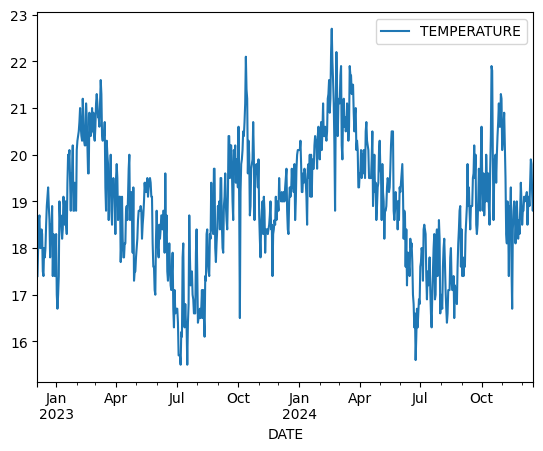

In [89]:
# Plotting Temperature column
weather.plot(y="TEMPERATURE")


<Axes: xlabel='DATE'>

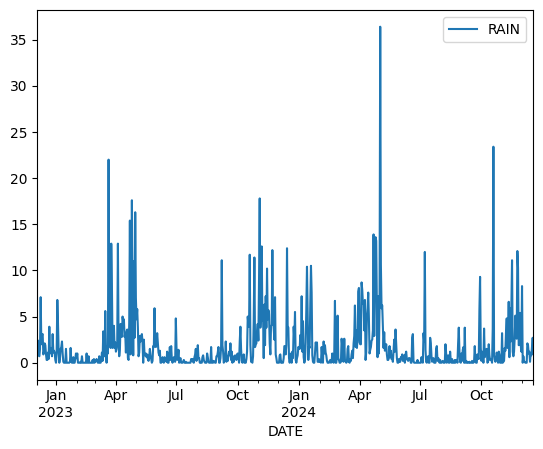

In [90]:
# Plotting the Rain column
weather.plot(y="RAIN")


In [91]:
weather

,TEMPERATURE,RAIN
DATE,,
2022-12-04,17.4,1.5
2022-12-05,18.0,2.4
2022-12-06,18.6,0.8
2022-12-07,18.7,0.7
2022-12-08,18.0,1.5
...,...,...
2024-12-14,19.9,1.0
2024-12-15,19.8,0.8
2024-12-16,19.2,1.7


#Fit the model

**Why prophet? ** *It works best with time series that have strong seasonal effects and several seasons of historical data. it is robust to missing data and shifts in the trend, and typically handles outliers as well*

We create and use a new `Prophet` object to train the model.
Any settings to the forecasting procedure are passed into the constructor.
Then call its `fit` method and pass in the historical dataframe.

The input to Prophet is always dataframe with two columns; `ds` and` y `.
where `ds` is the datestamp and `y` is the numeric measurement we wish to forecast ( for our case is Temperature and Rain)





In [92]:
# Rename the index 'DATE' to 'ds' and reset the index
weather = weather.rename_axis('ds').reset_index()

# First we forecast 'TEMPERATURE', rename it to 'y'
weather = weather.rename(columns={'TEMPERATURE': 'y'})

weather.head()

,ds,y,RAIN
0,2022-12-04,17.4,1.5
1,2022-12-05,18.0,2.4
2,2022-12-06,18.6,0.8
3,2022-12-07,18.7,0.7
4,2022-12-08,18.0,1.5


In [93]:
# Import necessary libraries
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
# Create a Prophet model with holidays for Kenya
# holidays is defined here using the Prophet's built in method.
m = Prophet()
m.add_country_holidays(country_name='KE')
m.fit(weather)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe9h5foxv/n05_pljh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe9h5foxv/3x19fyqa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6936', 'data', 'file=/tmp/tmpe9h5foxv/n05_pljh.json', 'init=/tmp/tmpe9h5foxv/3x19fyqa.json', 'output', 'file=/tmp/tmpe9h5foxv/prophet_model26kk9csu/prophet_model-20250111080431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


see list of holidays in

In [94]:
#List of holidays in Kenya
m.train_holiday_names

,0
0,New Year's Day
1,Good Friday
2,Easter Monday
3,Labour Day
4,Madaraka Day
5,Utamaduni Day
6,Mashujaa Day
7,Mashujaa Day (observed)
8,Jamhuri Day
9,Christmas Day


#Prediction

Predictions are then made on a dataframe with a column `ds` containing the dates for which a prediction is to be made.

To get a suitable dataframe that extends into the future a specified number of days (183 days ) using the helper method Prophet.`make_future_dataframe`.

By default include the dates from the history, so we will see the model fit as well.

In [95]:
future = m.make_future_dataframe(periods = 183, freq = 'D')
future.tail()


,ds
924,2025-06-15
925,2025-06-16
926,2025-06-17
927,2025-06-18
928,2025-06-19


The `predict` method will assign each row in `future` a predicted value which it names `yhat`.

If we  pass in historical dates, it will provide an in-sample fit. The `forecast `object here is a new dataframe that includes a column `yhat` with the forecast, as well as columns for components and uncertainty intervals.

In [96]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
924,2025-06-15,17.849275,16.975188,18.653040
925,2025-06-16,17.831609,16.998170,18.655201
926,2025-06-17,17.688486,16.776405,18.542193
927,2025-06-18,17.530017,16.690084,18.427094
928,2025-06-19,17.461399,16.588637,18.252419


Plotting the forecast by calling the `prophet.plot` method and passing in the forecast dataframe.

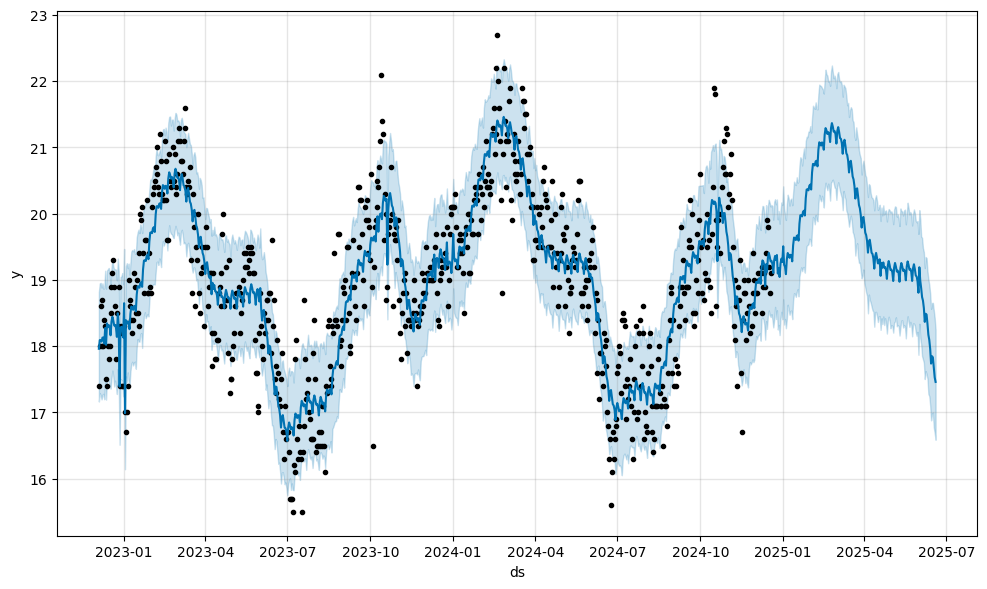

In [97]:
figl = m.plot(forecast)


To see the forecast components, we use the `Prophet.plot_components` method.
By default we can see the trend, yearly seasonality, and weekly seasonality of the time series. If we include holidays we can see that too

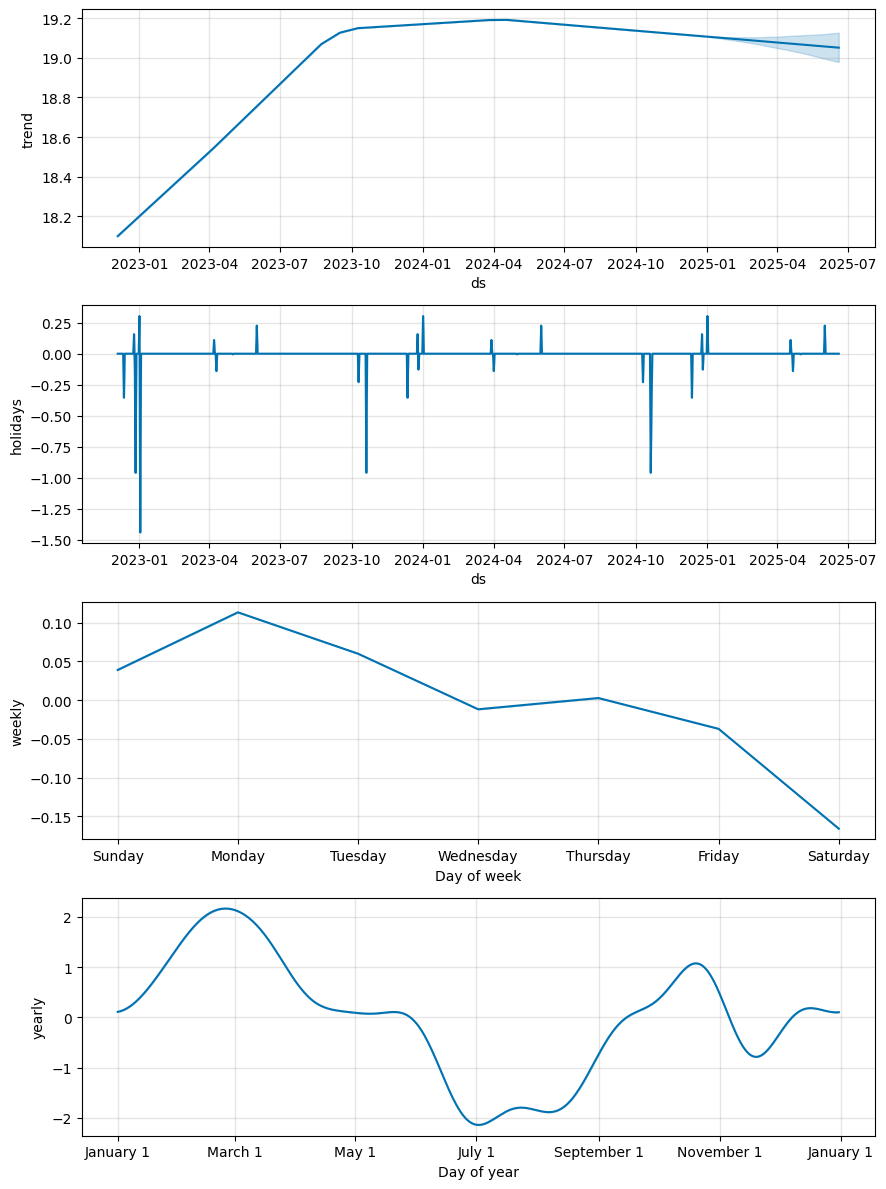

In [98]:

fig2 = m.plot_components(forecast)


To get an interactive figure of the forecast and components created with plotly. we installed plotly 4.0.

Then installed the `notebook` and `ipywidgets` packages.

In [99]:
from prophet.plot import plot_plotly, plot_components_plotly
fig = plot_plotly(m, forecast)
fig.show()

In [100]:
plot_components_plotly(m, forecast)


/usr/local/lib/python3.10/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.

